In [3]:
import torch
print(torch.backends.cudnn.enabled)

True


In [4]:
import torch
print(torch.version.cuda)

12.4


In [5]:
import torch

print(torch.cuda.is_available())

True


# Downscale


In [10]:
import os
import shutil
from PIL import Image

def downscale_images(input_dir, output_dir, scale_factor=0.6):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            file_path = os.path.join(root, file)
            relative_path = os.path.relpath(file_path, input_dir)
            output_path = os.path.join(output_dir, relative_path)
            output_dir_path = os.path.dirname(output_path)
            
            if not os.path.exists(output_dir_path):
                os.makedirs(output_dir_path)
            
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.JPG', '.JPEG' , '.PNG')):
                with Image.open(file_path) as img:
                    new_size = (int(img.width * scale_factor), int(img.height * scale_factor))
                    img = img.resize(new_size, Image.Resampling.LANCZOS)  # Updated line
                    img.save(output_path)
            elif file.lower().endswith('.txt'):
                shutil.copy(file_path, output_path)

# Downscale train images
downscale_images('data/train', 'data/down_40/train')

# Downscale validation images
downscale_images('data/val', 'data/down_40/val')


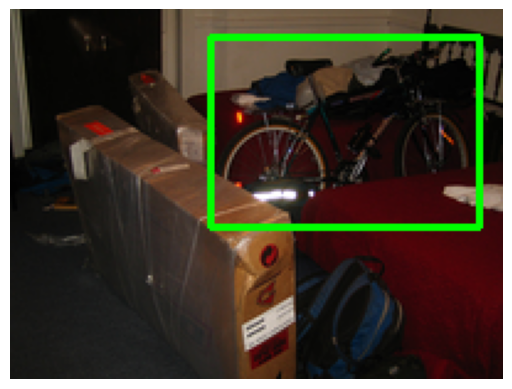

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, bbox_path):
    """
    Draw bounding boxes on the image.

    Parameters:
    image_path (str): The path to the image file.
    bbox_path (str): The path to the bounding box file.
    """
    # Load the image
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Read the bounding box file
    with open(bbox_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        class_id, x_center, y_center, bbox_width, bbox_height = [float(p) for p in parts]

        # Convert YOLO format to bounding box coordinates
        x_center *= width
        y_center *= height
        bbox_width *= width
        bbox_height *= height

        x_min = int(x_center - bbox_width / 2)
        y_min = int(y_center - bbox_height / 2)
        x_max = int(x_center + bbox_width / 2)
        y_max = int(y_center + bbox_height / 2)

        # Draw the bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Define the paths
image_path = 'data/down_40/train/2015_00001.png'
bbox_path = 'data/down_40/train/2015_00001.txt'

# Draw bounding boxes on the image
draw_bounding_boxes(image_path, bbox_path)

## CLAHE


In [1]:
import os
import cv2
from pathlib import Path

# Define paths
input_folder = "data/down_40/train"
output_folder = "data/down_40/train_CLAHE"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to apply CLAHE to an image
def apply_clahe(image):
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Process all image files in the input folder
for img_file in Path(input_folder).glob("*.*"):  # Match all file extensions
    try:
        # Read the image
        img = cv2.imread(str(img_file))
        
        if img is None:
            print(f"Skipping non-image file: {img_file}")
            continue
        
        # Apply CLAHE
        processed_img = apply_clahe(img)
        
        # Save the processed image to the output folder
        output_path = os.path.join(output_folder, img_file.name)
        cv2.imwrite(output_path, processed_img)
        
        print(f"Processed and saved: {output_path}")
    
    except Exception as e:
        print(f"Error processing {img_file}: {e}")

print("CLAHE processing completed.")


Skipping non-image file: data/down_40/train/2015_03952.txt
Processed and saved: data/down_40/train_CLAHE/2015_06982.jpg
Processed and saved: data/down_40/train_CLAHE/2015_05743.jpg
Skipping non-image file: data/down_40/train/2015_02489.txt
Skipping non-image file: data/down_40/train/2015_02558.txt
Processed and saved: data/down_40/train_CLAHE/2015_00746.jpg
Skipping non-image file: data/down_40/train/2015_07336.txt
Processed and saved: data/down_40/train_CLAHE/2015_00197.png
Processed and saved: data/down_40/train_CLAHE/2015_01663.jpg
Processed and saved: data/down_40/train_CLAHE/2015_02010.jpg
Processed and saved: data/down_40/train_CLAHE/2015_03108.jpg
Skipping non-image file: data/down_40/train/2015_05779.txt
Skipping non-image file: data/down_40/train/2015_03657.txt
Skipping non-image file: data/down_40/train/2015_01441.txt
Processed and saved: data/down_40/train_CLAHE/2015_04546.jpg
Processed and saved: data/down_40/train_CLAHE/2015_02370.jpg
Processed and saved: data/down_40/trai

libpng warning: iCCP: known incorrect sRGB profile


Skipping non-image file: data/down_40/train/2015_06487.txt
Processed and saved: data/down_40/train_CLAHE/2015_05616.jpg
Skipping non-image file: data/down_40/train/2015_04221.txt
Skipping non-image file: data/down_40/train/2015_03292.txt
Processed and saved: data/down_40/train_CLAHE/2015_04014.jpg
Processed and saved: data/down_40/train_CLAHE/2015_01247.jpg
Skipping non-image file: data/down_40/train/2015_02599.txt
Skipping non-image file: data/down_40/train/2015_03760.txt
Skipping non-image file: data/down_40/train/2015_04772.txt
Processed and saved: data/down_40/train_CLAHE/2015_03650.jpg
Processed and saved: data/down_40/train_CLAHE/2015_03554.jpg
Processed and saved: data/down_40/train_CLAHE/2015_07152.JPEG
Processed and saved: data/down_40/train_CLAHE/2015_01355.jpg
Processed and saved: data/down_40/train_CLAHE/2015_02228.jpg
Skipping non-image file: data/down_40/train/2015_03815.txt
Skipping non-image file: data/down_40/train/2015_06217.txt
Skipping non-image file: data/down_40/t

libpng warning: iCCP: known incorrect sRGB profile


Skipping non-image file: data/down_40/train/2015_04033.txt
Skipping non-image file: data/down_40/train/2015_04601.txt
Processed and saved: data/down_40/train_CLAHE/2015_01681.jpg
Processed and saved: data/down_40/train_CLAHE/2015_03814.jpg
Skipping non-image file: data/down_40/train/2015_02338.txt
Processed and saved: data/down_40/train_CLAHE/2015_02882.jpg
Processed and saved: data/down_40/train_CLAHE/2015_06051.JPG
Skipping non-image file: data/down_40/train/2015_06626.txt
Skipping non-image file: data/down_40/train/2015_04188.txt
Processed and saved: data/down_40/train_CLAHE/2015_03453.jpg
Processed and saved: data/down_40/train_CLAHE/2015_01748.jpg
Processed and saved: data/down_40/train_CLAHE/2015_02627.JPEG
Processed and saved: data/down_40/train_CLAHE/2015_01565.jpg
Skipping non-image file: data/down_40/train/2015_04731.txt
Processed and saved: data/down_40/train_CLAHE/2015_03512.jpg
Skipping non-image file: data/down_40/train/2015_06458.txt
Skipping non-image file: data/down_40

libpng warning: iCCP: known incorrect sRGB profile


Processed and saved: data/down_40/train_CLAHE/2015_02722.jpg
Processed and saved: data/down_40/train_CLAHE/2015_07270.jpg
Processed and saved: data/down_40/train_CLAHE/2015_06024.jpg
Skipping non-image file: data/down_40/train/2015_00372.txt
Processed and saved: data/down_40/train_CLAHE/2015_00940.jpg
Processed and saved: data/down_40/train_CLAHE/2015_04062.jpg
Skipping non-image file: data/down_40/train/2015_03021.txt
Processed and saved: data/down_40/train_CLAHE/2015_00610.jpg
Processed and saved: data/down_40/train_CLAHE/2015_03209.jpg
Processed and saved: data/down_40/train_CLAHE/2015_06062.JPG
Skipping non-image file: data/down_40/train/2015_00665.txt
Processed and saved: data/down_40/train_CLAHE/2015_06311.jpg
Skipping non-image file: data/down_40/train/2015_00386.txt
Processed and saved: data/down_40/train_CLAHE/2015_03716.jpg
Processed and saved: data/down_40/train_CLAHE/2015_00509.jpg
Skipping non-image file: data/down_40/train/2015_01885.txt
Processed and saved: data/down_40/

libpng warning: iCCP: known incorrect sRGB profile


Processed and saved: data/down_40/train_CLAHE/2015_01726.JPG
Processed and saved: data/down_40/train_CLAHE/2015_07000.jpg
Skipping non-image file: data/down_40/train/2015_06599.txt
Processed and saved: data/down_40/train_CLAHE/2015_04808.jpg
Processed and saved: data/down_40/train_CLAHE/2015_00056.jpg
Skipping non-image file: data/down_40/train/2015_06939.txt
Skipping non-image file: data/down_40/train/2015_06394.txt
Skipping non-image file: data/down_40/train/2015_07264.txt
Processed and saved: data/down_40/train_CLAHE/2015_03969.jpg
Processed and saved: data/down_40/train_CLAHE/2015_00706.jpg
Processed and saved: data/down_40/train_CLAHE/2015_05280.jpg
Processed and saved: data/down_40/train_CLAHE/2015_02808.jpg
Skipping non-image file: data/down_40/train/2015_03266.txt
Skipping non-image file: data/down_40/train/2015_02175.txt
Processed and saved: data/down_40/train_CLAHE/2015_02655.JPG
Processed and saved: data/down_40/train_CLAHE/2015_03236.jpg
Skipping non-image file: data/down_4

libpng warning: iCCP: known incorrect sRGB profile


Processed and saved: data/down_40/train_CLAHE/2015_00563.jpg
Processed and saved: data/down_40/train_CLAHE/2015_01832.jpg
Skipping non-image file: data/down_40/train/2015_03640.txt
Skipping non-image file: data/down_40/train/2015_00804.txt
Skipping non-image file: data/down_40/train/2015_05756.txt
Skipping non-image file: data/down_40/train/2015_01037.txt
Processed and saved: data/down_40/train_CLAHE/2015_01880.png
Processed and saved: data/down_40/train_CLAHE/2015_03194.jpg
Processed and saved: data/down_40/train_CLAHE/2015_04392.png
Processed and saved: data/down_40/train_CLAHE/2015_04421.jpg
Skipping non-image file: data/down_40/train/2015_05708.txt
Skipping non-image file: data/down_40/train/2015_00589.txt
Processed and saved: data/down_40/train_CLAHE/2015_02339.jpg
Skipping non-image file: data/down_40/train/2015_06157.txt
Processed and saved: data/down_40/train_CLAHE/2015_02398.jpg
Processed and saved: data/down_40/train_CLAHE/2015_03248.jpg
Skipping non-image file: data/down_40/

libpng warning: iCCP: known incorrect sRGB profile


Processed and saved: data/down_40/train_CLAHE/2015_03211.jpg
Processed and saved: data/down_40/train_CLAHE/2015_04223.jpg
Processed and saved: data/down_40/train_CLAHE/2015_01951.jpg
Processed and saved: data/down_40/train_CLAHE/2015_02508.jpg
Skipping non-image file: data/down_40/train/2015_06535.txt
Processed and saved: data/down_40/train_CLAHE/2015_04375.png
Processed and saved: data/down_40/train_CLAHE/2015_00429.jpg
Processed and saved: data/down_40/train_CLAHE/2015_07170.JPG
Skipping non-image file: data/down_40/train/2015_06542.txt
Processed and saved: data/down_40/train_CLAHE/2015_01333.jpg
Processed and saved: data/down_40/train_CLAHE/2015_00540.jpg
Skipping non-image file: data/down_40/train/2015_04507.txt
Processed and saved: data/down_40/train_CLAHE/2015_02140.jpg
Skipping non-image file: data/down_40/train/2015_01857.txt
Skipping non-image file: data/down_40/train/2015_04062.txt
Skipping non-image file: data/down_40/train/2015_04521.txt
Processed and saved: data/down_40/tr

In [2]:
# copy annotation to new folder for CLAHE

import os
import shutil
from pathlib import Path

# Define paths
input_folder = "data/down_40/train"
output_folder = "data/down_40/train_CLAHE"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Copy all .txt files from input folder to output folder
for txt_file in Path(input_folder).glob("*.txt"):
    try:
        # Define the destination path
        destination = os.path.join(output_folder, txt_file.name)
        
        # Copy the file
        shutil.copy(txt_file, destination)
        
        print(f"Copied: {txt_file} to {destination}")
    except Exception as e:
        print(f"Error copying {txt_file}: {e}")

print("Text file copying completed.")

Copied: data/down_40/train/2015_03952.txt to data/down_40/train_CLAHE/2015_03952.txt
Copied: data/down_40/train/2015_02489.txt to data/down_40/train_CLAHE/2015_02489.txt
Copied: data/down_40/train/2015_02558.txt to data/down_40/train_CLAHE/2015_02558.txt
Copied: data/down_40/train/2015_07336.txt to data/down_40/train_CLAHE/2015_07336.txt
Copied: data/down_40/train/2015_05779.txt to data/down_40/train_CLAHE/2015_05779.txt
Copied: data/down_40/train/2015_03657.txt to data/down_40/train_CLAHE/2015_03657.txt
Copied: data/down_40/train/2015_01441.txt to data/down_40/train_CLAHE/2015_01441.txt
Copied: data/down_40/train/2015_01202.txt to data/down_40/train_CLAHE/2015_01202.txt
Copied: data/down_40/train/2015_05889.txt to data/down_40/train_CLAHE/2015_05889.txt
Copied: data/down_40/train/2015_02880.txt to data/down_40/train_CLAHE/2015_02880.txt
Copied: data/down_40/train/2015_00231.txt to data/down_40/train_CLAHE/2015_00231.txt
Copied: data/down_40/train/2015_05348.txt to data/down_40/train_C